In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from scalecast.Forecaster import Forecaster
%matplotlib inline

mtalbert = pd.read_csv('../Data/soil data/mtalbert-648717-20241008172730/MtAlbert_Data_c15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
mtalbert.head()


,Timestamp (UTC+12:00),SoilMoisture(%),SoilTemp(c),Rain(mm)
0,2019-05-26 06:00:00,41.620375,14.4000,0.0
1,2019-05-26 07:00:00,41.610875,14.3625,0.0
2,2019-05-26 08:00:00,41.591000,14.3000,0.0
3,2019-05-26 09:00:00,41.594750,14.3625,0.0
4,2019-05-26 10:00:00,41.582875,14.4000,0.0


In [2]:
mtalbert.set_index('Timestamp (UTC+12:00)', inplace=True)

mtalbert = mtalbert.resample('H').agg({
    'SoilMoisture(%)': 'mean',
    'SoilTemp(c)': 'mean',
    'Rain(mm)': 'sum'
})
mtalbert.head()

C:\Users\Ying\AppData\Local\Temp\ipykernel_9412\1502391843.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  mtalbert = mtalbert.resample('H').agg({


,SoilMoisture(%),SoilTemp(c),Rain(mm)
Timestamp (UTC+12:00),,,
2019-05-26 06:00:00,41.620375,14.4000,0.0
2019-05-26 07:00:00,41.610875,14.3625,0.0
2019-05-26 08:00:00,41.591000,14.3000,0.0
2019-05-26 09:00:00,41.594750,14.3625,0.0
2019-05-26 10:00:00,41.582875,14.4000,0.0


<Axes: xlabel='Timestamp (UTC+12:00)'>

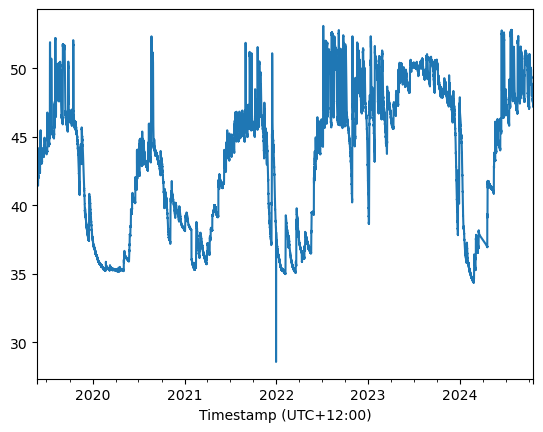

In [3]:
mtalbert['SoilMoisture(%)'].plot()

In [4]:
mtalbert['SoilMoisture(%)'].describe()

count    47370.000000
mean        43.376219
std          5.181335
min         28.557375
25%         38.312406
50%         44.143563
75%         47.567625
max         53.103500
Name: SoilMoisture(%), dtype: float64

In [5]:
sm = Forecaster(y=mtalbert['SoilMoisture(%)'],current_dates=mtalbert.index)
sm

Forecaster(
    DateStartActuals=2019-05-26T06:00:00.000000000
    DateEndActuals=2024-10-19T23:00:00.000000000
    Freq=h
    N_actuals=47370
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

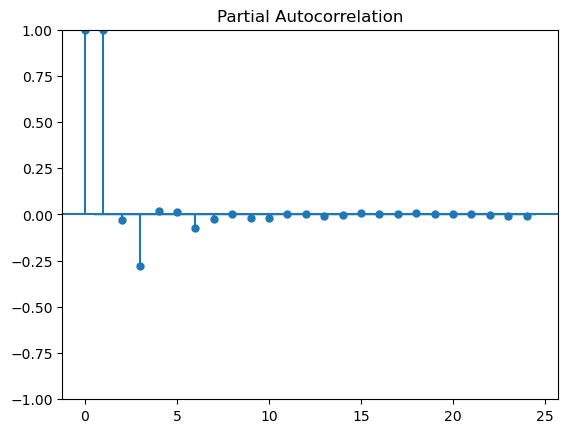

In [6]:
sm.plot_pacf(lags=24)
plt.show()

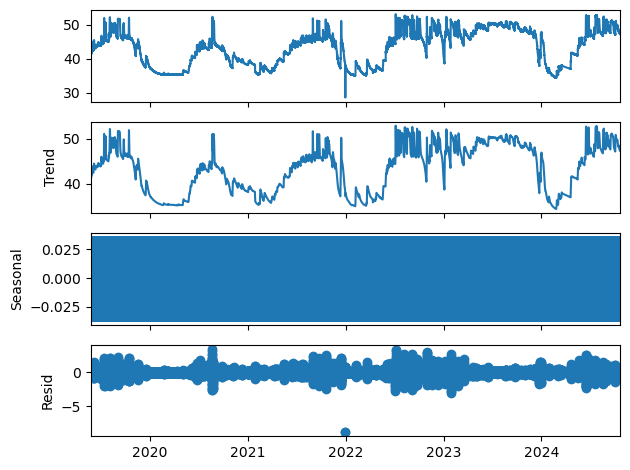

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

sm.seasonal_decompose().plot()
plt.show()

In [8]:
# evidence to reject the null hypothesis of non-stationarity
sm.adf_test(full_res=True)

(-4.07698527750608,
 0.0010569282975362775,
 40,
 47329,
 {'1%': -3.4304881743688167,
  '5%': -2.8616010701573407,
  '10%': -2.566802505638203},
 -49263.99626601518)

In [9]:
24*30

720

In [10]:
sm.set_test_length(0.15)
sm.generate_future_dates(n=720)  # For 30 days
sm.set_estimator('lstm')

1037/1037 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 0.3020
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.2332
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

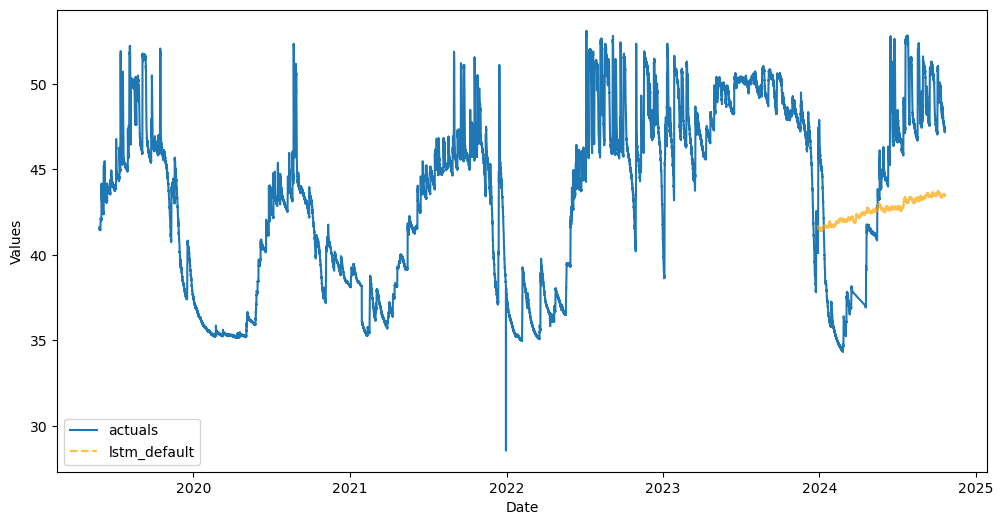

In [11]:
sm.manual_forecast(call_me='lstm_default')
sm.plot_test_set(ci=True)


In [12]:
24*21

504

1036/1036 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.2430
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - loss: 0.1604
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1458/1458 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

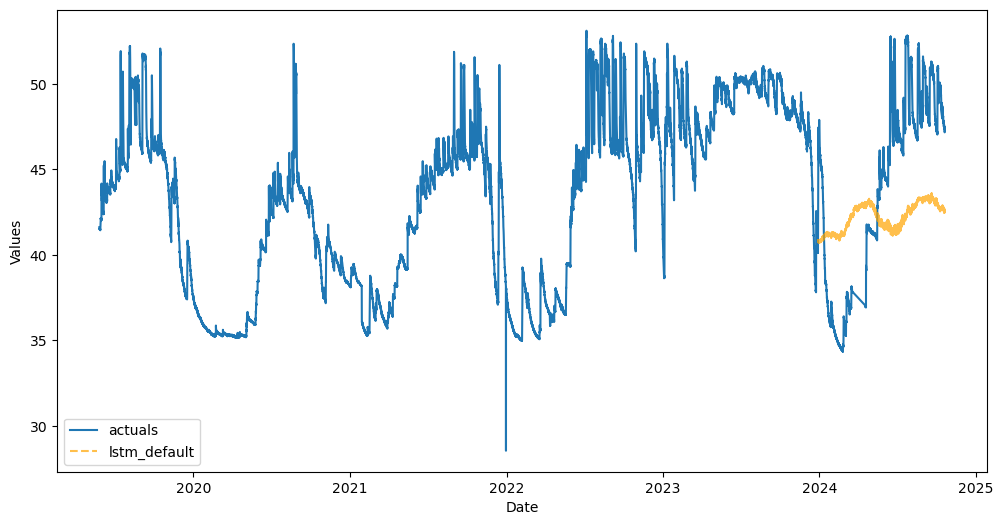

In [13]:
# 1 day
sm.manual_forecast(call_me='lstm_default', lags=24)
sm.plot_test_set(ci=True)


1034/1034 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - loss: 0.2468
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 31s 18ms/step - loss: 0.1659
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step
1456/1456 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

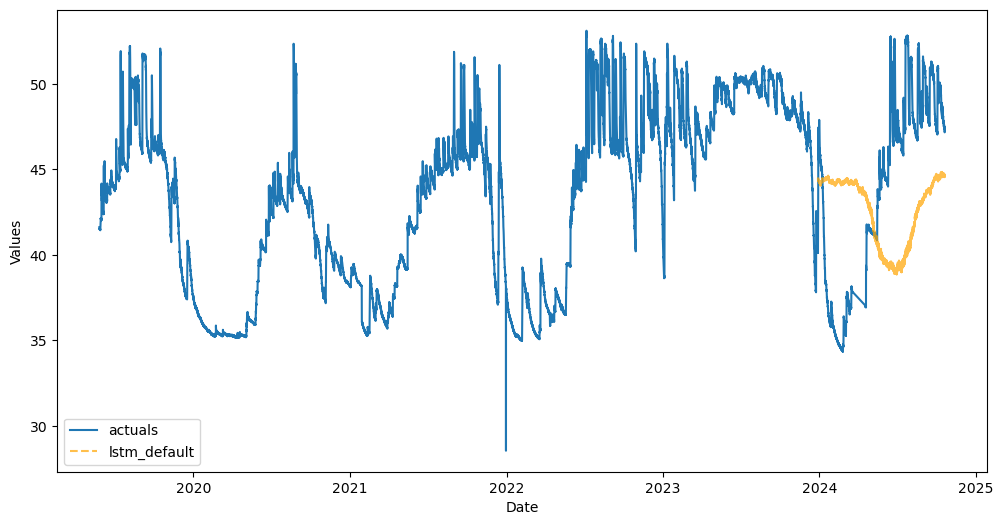

In [14]:
# 3 day
sm.manual_forecast(call_me='lstm_default', lags=72)
sm.plot_test_set(ci=True)


1031/1031 ━━━━━━━━━━━━━━━━━━━━ 31s 27ms/step - loss: 0.2449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 57s 36ms/step - loss: 0.1672
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step
1453/1453 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

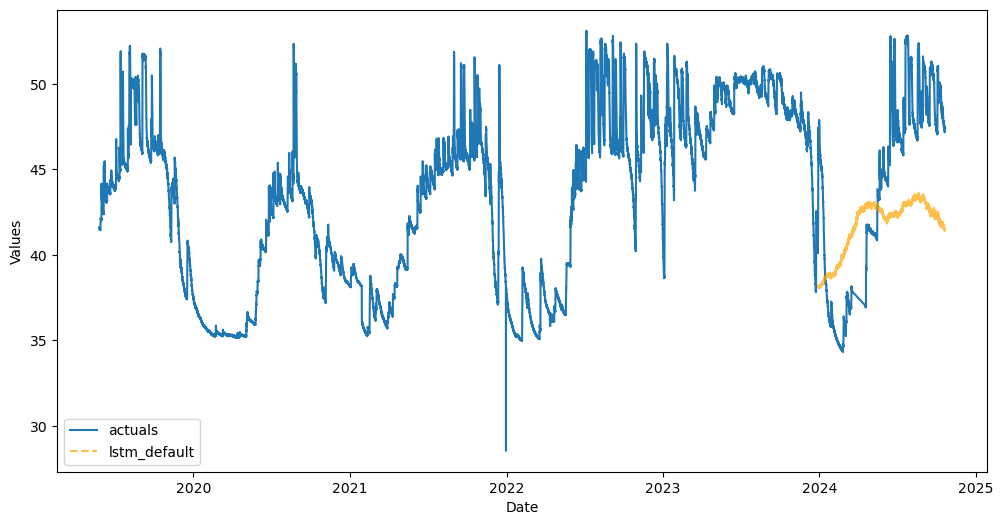

In [15]:
# 7 days
sm.manual_forecast(call_me='lstm_default', lags=168)
sm.plot_test_set(ci=True)


1026/1026 ━━━━━━━━━━━━━━━━━━━━ 72s 66ms/step - loss: 0.2522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 99s 66ms/step - loss: 0.1792
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1448/1448 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

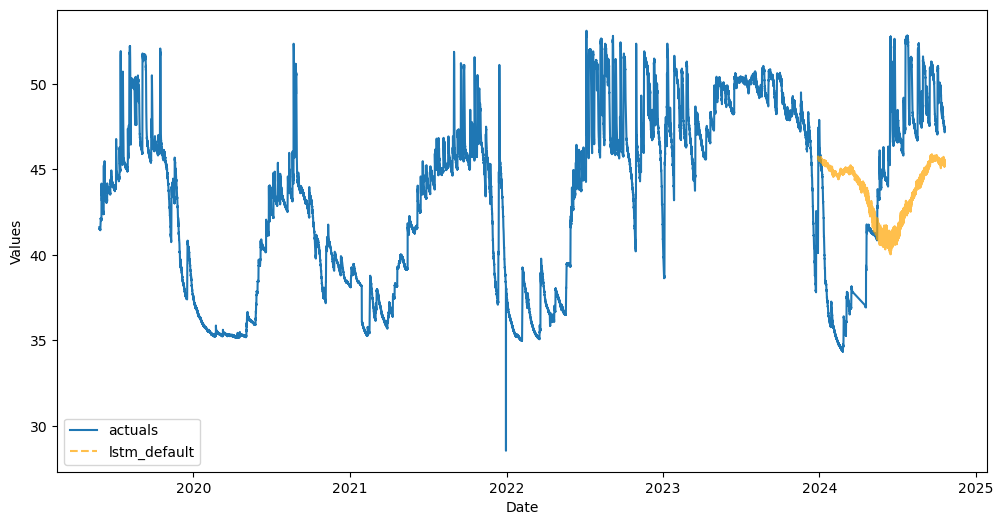

In [16]:
# 14 days
sm.manual_forecast(call_me='lstm_default', lags=336)
sm.plot_test_set(ci=True)


In [17]:
21*24

504

1021/1021 ━━━━━━━━━━━━━━━━━━━━ 103s 98ms/step - loss: 0.2474
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 141s 95ms/step - loss: 0.1807
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step
1443/1443 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

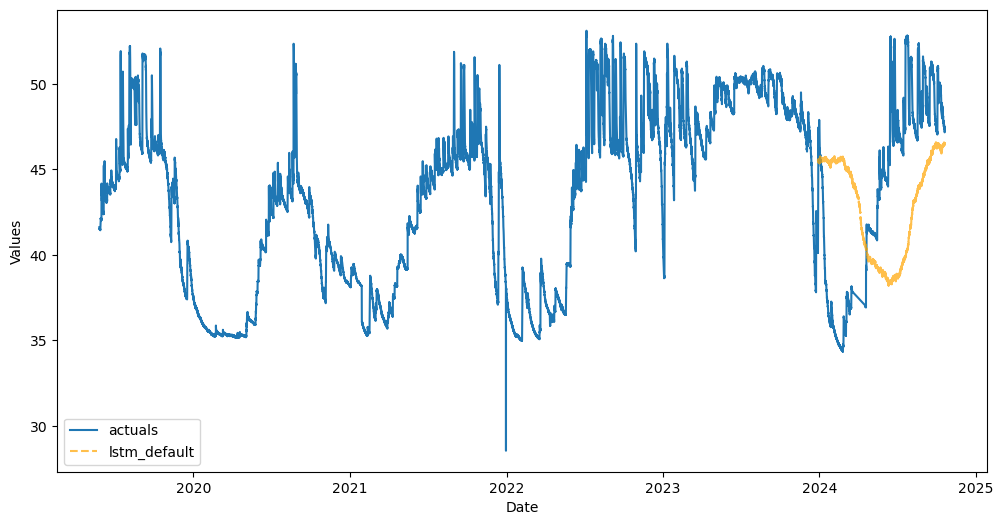

In [18]:
# 21 days
sm.manual_forecast(call_me='lstm_default', lags=504)
sm.plot_test_set(ci=True)


In [19]:
28*24

672

1014/1014 ━━━━━━━━━━━━━━━━━━━━ 142s 136ms/step - loss: 0.2449
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 199s 136ms/step - loss: 0.1966
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step
1436/1436 ━━━━━━━━━━━━━━━━━━━━ 44s 30ms/step


c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

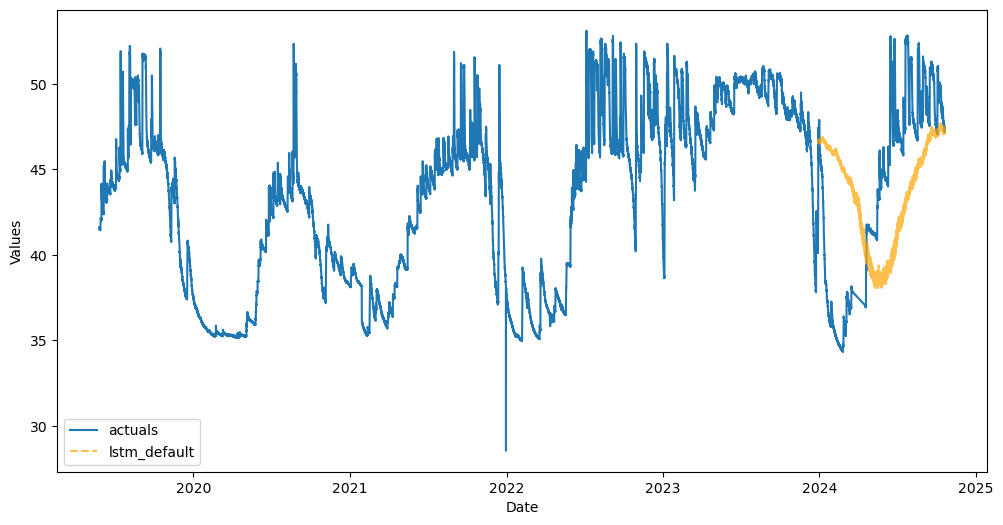

In [20]:
# 30 days
sm.manual_forecast(call_me='lstm_default', lags=720)
sm.plot_test_set(ci=True)

In [21]:
# def short_term_forecast (sm, forecast_days):
#     sm.set_test_length(0.15)
#     n_hours = forecast_days * 24
#     sm.generate_future_dates(n=n_hours)
#     sm.set_estimator('lstm short_term_forecast')
    
#     if forecast_days == 1:
#         lags = 24 
#     elif forecast_days == 7:
#         lags = 168  
#     elif forecast_days == 14:
#         lags = 336  
#     else:
#         raise ValueError("forecast_days should be 1, 7 or 14")
    
#     sm.manual_forecast(call_me='lstm_short_term', lags=lags)

#     # Plot the results with confidence intervals
#     sm.plot_test_set(ci=True)
#     plt.title(f'Short-Term Forecast: {forecast_days} Days')
#     plt.show()

Epoch 1/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 92s 109ms/step - loss: 0.1520 - val_loss: 0.1018
Epoch 2/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 87s 108ms/step - loss: 0.1079 - val_loss: 0.1046
Epoch 3/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 145s 111ms/step - loss: 0.1249 - val_loss: 0.1146
Epoch 4/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 87s 107ms/step - loss: 0.1392 - val_loss: 0.1164
Epoch 5/5
811/811 ━━━━━━━━━━━━━━━━━━━━ 89s 109ms/step - loss: 0.1424 - val_loss: 0.1227
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
Epoch 1/5
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 167s 142ms/step - loss: 0.1906 - val_loss: 0.2341
Epoch 2/5
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 169s 147ms/step - loss: 0.0705 - val_loss: 0.2380
Epoch 3/5
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 175s 152ms/step - loss: 0.0768 - val_loss: 0.2416
Epoch 4/5
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 161s 140ms/step - loss: 0.0832 - val_loss: 0.2446
Epoch 5/5
1149/1149 ━━━━━━━━━━━━━━━━━━━━ 154s 134ms/step - loss: 0.0896 - val_loss: 0.2479
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1436/1436 ━━━━━━━━━━━━━━━━

c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_default. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(
c:\Users\Ying\.conda\envs\level8\lib\site-packages\scalecast\_utils.py:60: Warning: Confidence intervals not found for lstm_30days_lag. To turn on confidence intervals for future evaluated models, call the eval_cis() method.
  warnings.warn(


<Axes: xlabel='Date', ylabel='Values'>

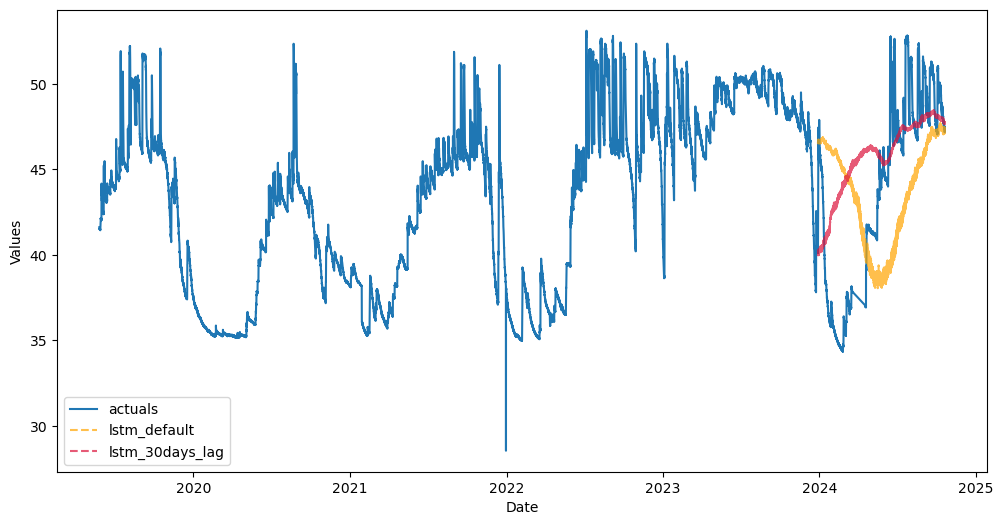

In [22]:
validation_split=0.2

# 30 days
sm.manual_forecast(call_me='lstm_30days_lag', lags=720, epochs=5, validation_split=validation_split, shuffle=False)

sm.plot_test_set(ci=True)


In [23]:
from scalecast.SeriesTransformer import SeriesTransformer
transformer = SeriesTransformer(sm)
f = transformer.DiffTransform()
f.add_ar_terms(24)
f.add_seasonal_regressors()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
rmse_lstm = np.sqrt(mean_squared_error(y_test, lstm_predictions))
mae_lstm = mean_absolute_error(y_test, lstm_predictions)
mse_lstm = mean_squared_error(y_test, lstm_predictions)
r2_lstm = r2_score(y_test, lstm_predictions)
print(f"LSTM RMSE: {rmse_lstm}")
print("LSTM Mean Absolute Error (MAE):", mae_lstm)
print("LSTM Mean Squared Error (MSE):", mse_lstm)
print("LSTM R2 Score:", r2_lstm)

NameError: name 'y_test' is not defined